This notebook servers both as a tutorial as well as a functional test for a (minimum viable product) analyses pipeline computing t scores of gaze date during a workload task while running on a treadmill vs. pedaling on a bike. Below are the implemented steps showcasing a workflow using package paraheat to run pixelwise mass-univariate linear tests on gaze data.

# Eye tracking behavior two-sample ttest (minimum viable product)

define one specific interesting use case for the crd data → then develop to do this as a minimum viable   product → should include physical activity

- [x]  I have time series eye tracking data for multiple subjects and two conditions (between subjects bike vs. treadmill)
- [x]  bin time series eye tracking data for each subject and condition with the same parameters used for binning
- [x]  plot the histogram with an overlay of my task image for each subject and condition plus the condition grand-average
- [x]  compute a ttest between conditions
- [x]  apply a multiple comparison correction (FDR)
- [x]  plot t map with a significance mask with overlay of crd task image




## Import pandas, read and prepare input data

The standard input format of choice are pandas dataframes in 'long' format with columns X, Y, Z for data and variable length dataframe for the design matrix. 

In [1]:
import pandas as pd
import numpy as np

# read data
bike_plow_whigh = pd.read_csv('/Users/lukasgehrke/Documents/temp/chatham/crd_gaze_phys-LOW_work-HIGH_equip-Bike_all_good_s.csv')
tread_plow_whigh = pd.read_csv('/Users/lukasgehrke/Documents/temp/chatham/crd_gaze_phys-LOW_work-HIGH_equip-Treadmill_all_good_s.csv')

# bike_phigh_whigh = pd.read_csv('/Users/lukasgehrke/Documents/temp/chatham/crd_gaze_phys-HIGH_work-HIGH_equip-Bike_all_good_s.csv')
# tread_phigh_whigh = pd.read_csv('/Users/lukasgehrke/Documents/temp/chatham/crd_gaze_phys-HIGH_work-HIGH_equip-Treadmill_all_good_s.csv')

# design matrix
# get unique pIDs per locomotion
pID_bike = pd.Series(bike_plow_whigh['pID'].unique())
pID_tread = pd.Series(tread_plow_whigh['pID'].unique())
pID = pID_bike.append(pID_tread)
# define contrast
bike = pd.Series(['bike'] * pID_bike.shape[0])
tread = pd.Series(['tread'] * pID_tread.shape[0])
locomotion = bike.append(tread)
# make design matrix
design = pd.concat([pID, locomotion], axis=1)
design.columns = ['pID', 'Locomotion']

design.head()

,pID,Locomotion
0,23,bike
1,24,bike
2,26,bike
3,29,bike
4,30,bike


## Import paraheat package



In [2]:
import sys
sys.path.append('/Users/lukasgehrke/Documents/code/paraheat/heat/')

# inmport module
from heat import Heat

## Paraheat processing pipeline

In [3]:
# init analyses
# set edges and binning params

# Analyses.compute_binning: loop through data and compute binning per subject and retain per subject bin counts
tmp_bike = []
for p in pID_bike:

    tmp_p = bike_plow_whigh[bike_plow_whigh['pID'] == p]
    tmp_p = tmp_p[['X', 'Y']]

    h = Heat(str(p), tmp_p, None)
    h.heatmap = h.binned_statistic(bins=25)

    # apply further signal processing
    # h.heatmap = h.zscore(h.heatmap)
    # h.heatmap = h.gaussian(h.heatmap, 2)

    tmp_bike.append(h.heatmap.statistic.ravel())

tmp_tread = []
for p in pID_tread:

    tmp_p = tread_plow_whigh[tread_plow_whigh['pID'] == p]
    tmp_p = tmp_p[['X', 'Y']]

    h = Heat(str(p), tmp_p, None)
    h.heatmap = h.binned_statistic(bins=25)

    # apply further signal processing
    # h.heatmap = h.zscore(h.heatmap)
    # h.heatmap = h.gaussian(h.heatmap, 2)

    tmp_tread.append(h.heatmap.statistic.ravel())

tmp_bike.shape


AttributeError: 'list' object has no attribute 'shape'

## init and build plot: grand average

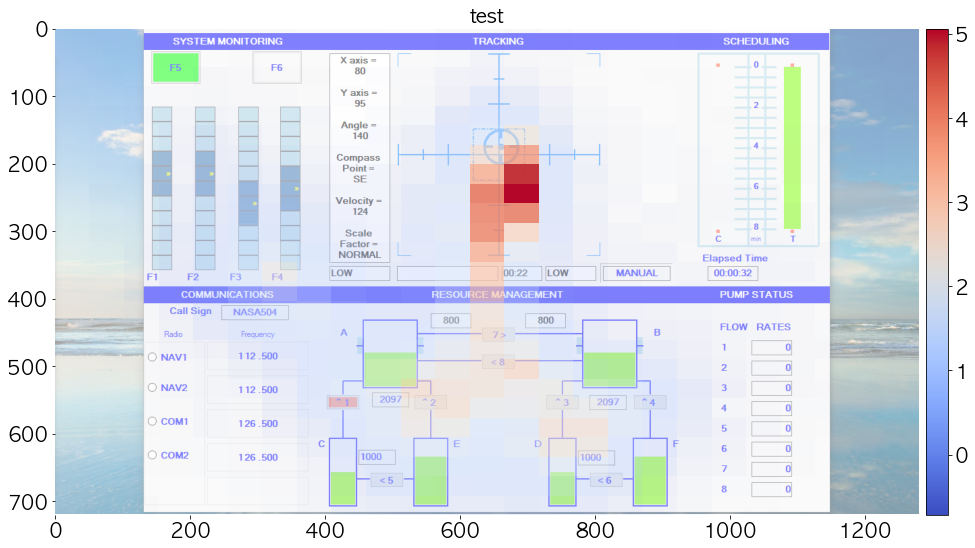

In [4]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats

from plot import Plot

# read background image for heatmap
img = mpimg.imread('/Users/lukasgehrke/Documents/temp/matb.png')

# grand average locomotion type bike
ga_bike = sum(tmp_bike) / len(tmp_bike)
# zscore
ga_bike = stats.zscore(ga_bike)
# plt.hist(ga_bike)
ga_bike = np.reshape(ga_bike, (25, 25))

# grand average locomotion type tread
ga_tread = sum(tmp_tread) / len(tmp_tread)
ga_tread = stats.zscore(ga_tread)
ga_tread = np.reshape(ga_tread, (25, 25))

# create plot and add plot data
ga_bike_heat = Heat(name='ga_bike', data=None, heatmap=ga_bike.T)
ga_tread_heat = Heat('ga_bike', None, ga_tread.T)

extent = [0, img.shape[1], img.shape[0], 0]
p = Plot(heat=ga_tread_heat, bg_image=img, extent=extent)
p.cm = plot.make_cm_transparent(plt.cm.coolwarm)

# create plot window
# fig = plt.figure()
# plt.imshow(p.bg_image, alpha=1) # for image

# add heatmap
p.heat_xy('test', superimpose_on_bg=True)

# draw plot
plt.show()

## compute ttest

In [5]:
from modeling import Modeling

m = Modeling()

# grand_average = sum(tmp) / len(tmp)
all_bike = pd.DataFrame(tmp_bike)
all_tread = pd.DataFrame(tmp_tread)

# concat with pID and group
data = all_bike.append(all_tread)
data = pd.concat([data, design.Locomotion], axis=1)

# data.head()
# data

res = m.ttest_per_bin(data, "Locomotion", "bike", "tread")

print(res)

ttest column: 0
ttest column: 1
ttest column: 2
ttest column: 3
ttest column: 4
ttest column: 5
ttest column: 6
ttest column: 7
ttest column: 8
ttest column: 9
ttest column: 10
ttest column: 11
ttest column: 12
ttest column: 13
ttest column: 14
ttest column: 15
ttest column: 16
ttest column: 17
ttest column: 18
ttest column: 19
ttest column: 20
ttest column: 21
ttest column: 22
ttest column: 23
ttest column: 24
ttest column: 25
ttest column: 26
ttest column: 27
ttest column: 28
ttest column: 29
ttest column: 30
ttest column: 31
ttest column: 32
ttest column: 33
ttest column: 34
ttest column: 35
ttest column: 36
ttest column: 37
ttest column: 38
ttest column: 39
ttest column: 40
ttest column: 41
ttest column: 42
ttest column: 43
ttest column: 44
ttest column: 45
ttest column: 46
ttest column: 47
ttest column: 48
ttest column: 49
ttest column: 50
ttest column: 51
ttest column: 52
ttest column: 53
ttest column: 54
ttest column: 55
ttest column: 56
ttest column: 57
ttest column: 58
ttest c

## apply MCC: here FDR

In [6]:
import mne.stats as mcc

fdr_mask = mcc.fdr_correction(res.pvalue, .05, 'indep')

fdr_mask

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,
      

## Plot t score map with contour of significant pixels after FDR MCC

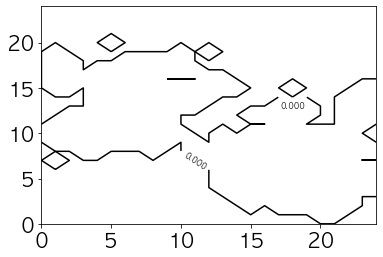

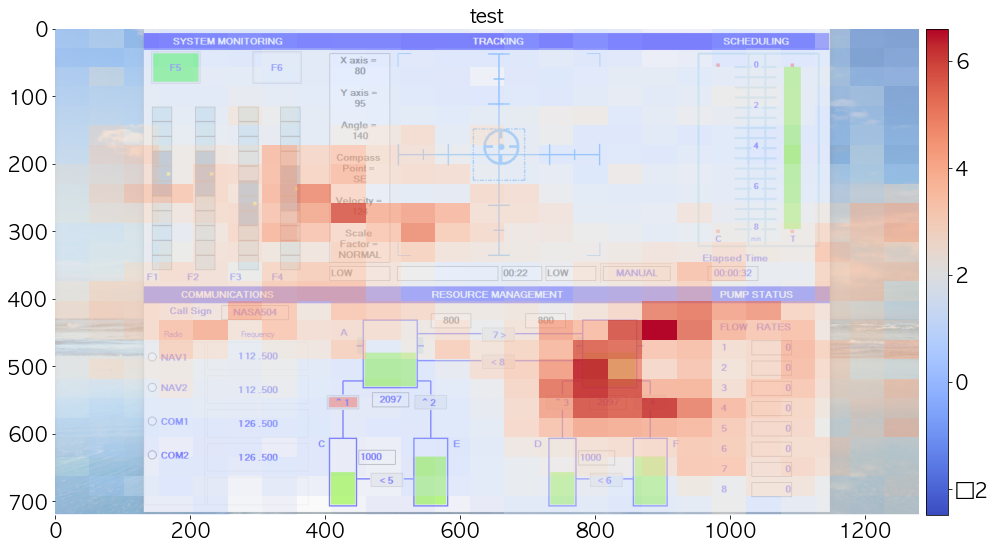

In [7]:

from plot import Plot

# read background image for heatmap
img = mpimg.imread('/Users/lukasgehrke/Documents/temp/matb.png')

# create plot and add plot data
# reshape stats results
t_stat = np.reshape(np.array(res.statistic),(25,25))
t_cont_locomotion = Heat(name='t_cont_bike_v_tread', data=None, heatmap=t_stat)

# extent = [0, img.shape[1], img.shape[0], 0]
p = Plot(heat=t_cont_locomotion, bg_image=img, extent=extent)
p.cm = plot.make_cm_transparent(plt.cm.coolwarm)

mask = fdr_mask[0]*fdr_mask[1]
mask = np.reshape(mask,(25,25))

contours = plt.contour(mask, levels=[.05], colors='black')
plt.clabel(contours, inline=True, fontsize=8)

# draw plot
p.heat_xy('test', superimpose_on_bg=True, mask=None)